<a href="https://colab.research.google.com/github/alecoder1/EPL-Championship-Full-Analysis-and-Model-Prediction/blob/main/EPL_%26_Championship_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## - The EPL & Championship Full Dataset likely includes comprehensive historical and current data for the English Premier League (EPL) and the English Football League Championship (EFL Championship). This dataset could cover a wide range of football (soccer) statistics, such as:

- Match Details: Information on individual matches, including home and away teams, match scores (goals for each team), and match outcomes (win, loss, draw).

- Team Performance: Metrics like total goals, goals conceded, possession percentages, and performance across seasons.

- Player Stats: Individual player performance data such as goals, assists, yellow/red cards, shots, and other relevant player statistics.

- League Tables: Position rankings of teams across different seasons, points, and goal differences.

- Fixtures and Results: A record of scheduled matches, results, and historical match data.

- Referees: Information on match officials (referees, linesmen) and any disciplinary actions they might have taken during matches

- Additional Features: Data on home and away performances, shot accuracy, foul counts, corner statistics, and perhaps injuries or transfers.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Data/England CSV.csv')


In [ ]:
df.head()


,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

In [ ]:
df.shape

(12153, 25)

In [ ]:
df.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League'],
      dtype='object')

In [ ]:
df.describe(include='all')

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
count,12153,12153,12153,12153,12153.000000,12153.000000,12153,11229.000000,11229.000000,11229,...,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04,12153
unique,3346,32,53,53,NaN,NaN,3,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,1/01/1994,1993/94,Man United,Arsenal,NaN,NaN,H,NaN,NaN,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Premier League
freq,11,462,604,604,NaN,NaN,5563,NaN,NaN,4644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12153
mean,NaN,NaN,NaN,NaN,1.531309,1.160948,NaN,0.689554,0.511265,NaN,...,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07,NaN
std,NaN,NaN,NaN,NaN,1.306927,1.147714,NaN,0.838796,0.731610,NaN,...,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04,NaN
min,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07,NaN
25%,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,0.000000,NaN,...,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07,NaN
50%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,0.000000,NaN,...,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07,NaN
75%,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,1.000000,NaN,...,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07,NaN


### Checking formissing values

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date                0
Season              0
HomeTeam            0
AwayTeam            0
FTH Goals           0
FTA Goals           0
FT Result           0
HTH Goals         924
HTA Goals         924
HT Result         924
Referee          2824
H Shots          2824
A Shots          2824
H SOT            2824
A SOT            2824
H Fouls          2824
A Fouls          2824
H Corners        2824
A Corners        2824
H Yellow         2824
A Yellow         2824
H Red            2824
A Red            2824
Display_Order       0
League              0
dtype: int64


In [ ]:
print("\nSummary statistics:\n", df.describe())


Summary statistics:
           FTH Goals     FTA Goals     HTH Goals     HTA Goals      H Shots  \
count  12153.000000  12153.000000  11229.000000  11229.000000  9329.000000   
mean       1.531309      1.160948      0.689554      0.511265    13.618716   
std        1.306927      1.147714      0.838796      0.731610     5.349420   
min        0.000000      0.000000      0.000000      0.000000     0.000000   
25%        1.000000      0.000000      0.000000      0.000000    10.000000   
50%        1.000000      1.000000      0.000000      0.000000    13.000000   
75%        2.000000      2.000000      1.000000      1.000000    17.000000   
max        9.000000      9.000000      5.000000      5.000000    43.000000   

           A Shots        H SOT        A SOT      H Fouls      A Fouls  \
count  9329.000000  9329.000000  9329.000000  9329.000000  9329.000000   
mean     10.784543     6.007503     4.704684    11.303462    11.781113   
std       4.678710     3.275177     2.757288     3.75

### Most frequent home teams

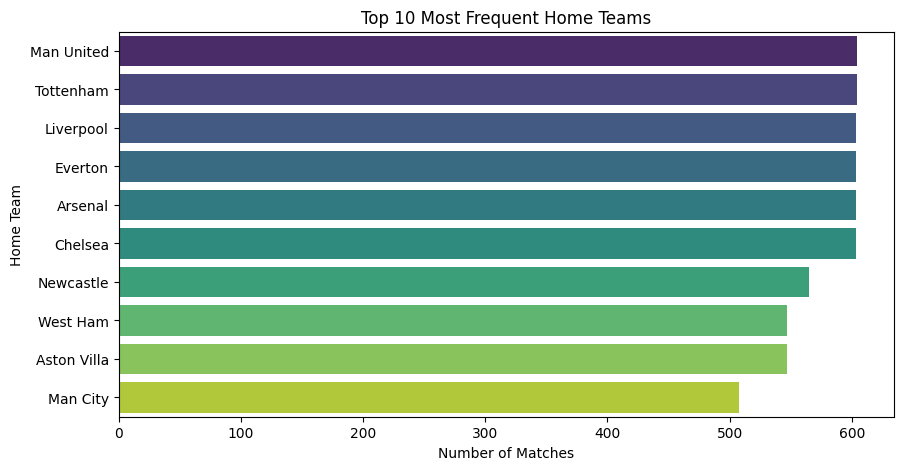

In [ ]:
if 'HomeTeam' in df.columns:
  top_home_teams = df['HomeTeam'].value_counts().head(10)
  plt.figure(figsize=(10, 5))
  sns.barplot(x=top_home_teams.values, y=top_home_teams.index,
              palette='viridis')
  plt.xlabel('Number of Matches')
  plt.ylabel('Home Team')
  plt.title('Top 10 Most Frequent Home Teams')
  plt.show()

### Most frequent away teams


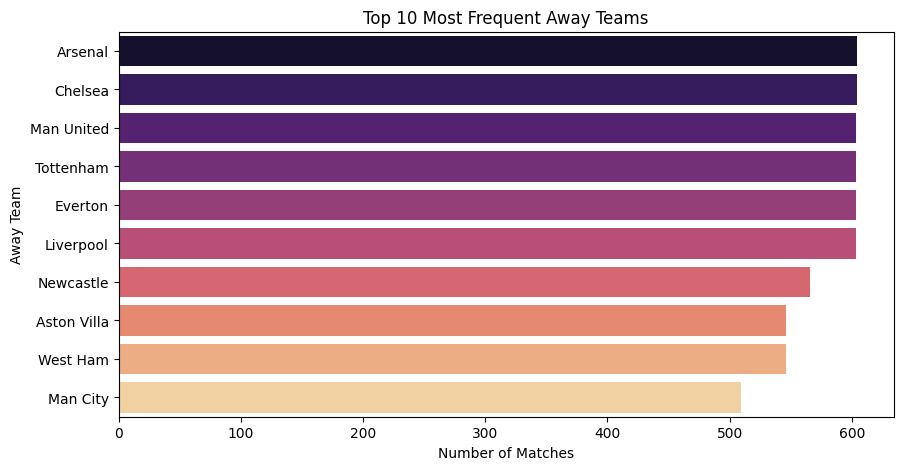

In [ ]:
if 'AwayTeam' in df.columns:
  top_away_teams = df['AwayTeam'].value_counts().head(10)
  plt.figure(figsize=(10, 5))
  sns.barplot(x=top_away_teams.values, y=top_away_teams.index,
              palette='magma')
  plt.xlabel("Number of Matches")
  plt.ylabel("Away Team")
  plt.title("Top 10 Most Frequent Away Teams")
  plt.show()

# Distribution of full time home goals

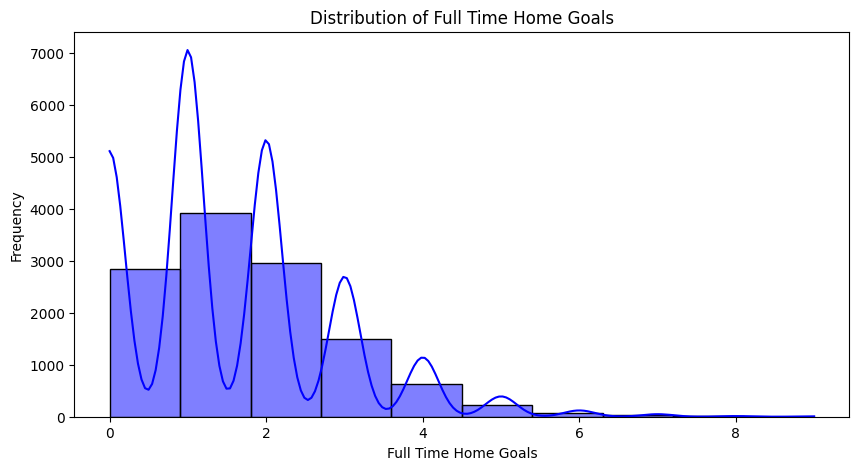

In [ ]:

if 'FTH Goals' in df.columns: # Full time home goals
  plt.figure(figsize=(10, 5))
  sns.histplot(df['FTH Goals'], bins=10, kde=True, color='b')
  plt.xlabel('Full Time Home Goals')
  plt.ylabel('Frequency')
  plt.title('Distribution of Full Time Home Goals')
  plt.show(block=True)

In [ ]:
df.head()

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,...,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,16/01/2025,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,...,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League
1,16/01/2025,2024/25,Man United,Southampton,3,1,H,0.0,1.0,A,...,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League
2,15/01/2025,2024/25,Everton,Aston Villa,0,1,A,0.0,0.0,D,...,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League
3,15/01/2025,2024/25,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,...,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League
4,15/01/2025,2024/25,Newcastle,Wolves,3,0,H,1.0,0.0,H,...,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League


In [ ]:
print(df['FTH Goals'].head())

0    0
1    3
2    0
3    0
4    3
Name: FTH Goals, dtype: int64


#### DISTRIBUTION OF FULL-TIME AWAY GOALS

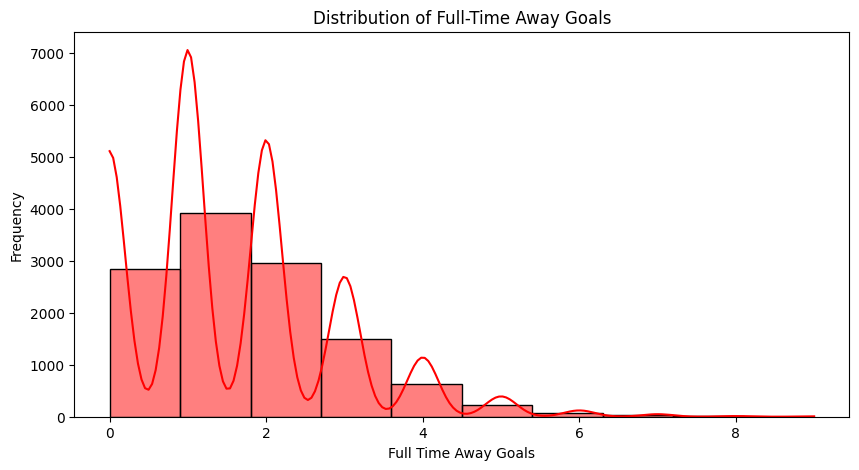

In [ ]:
if 'FTA Goals' in df.columns:
  plt.figure(figsize=(10, 5))
  sns.histplot(df['FTH Goals'], bins=10, kde=True, color='r',)
  plt.xlabel("Full Time Away Goals")
  plt.ylabel("Frequency")
  plt.title("Distribution of Full-Time Away Goals")
  plt.show()


### Most common full-time results


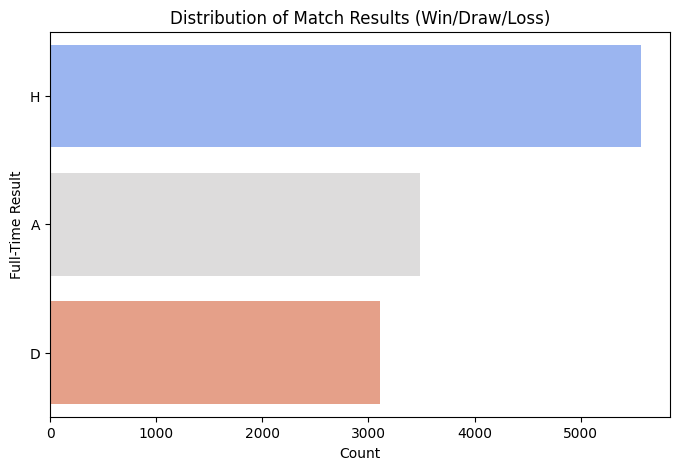

In [ ]:
if 'FT Result' in df.columns:
  # Full-Time Result (H: Home Win, A: Away Win, D: Draw)
  plt.figure(figsize=(8, 5))
  sns.countplot(y=df['FT Result'], order=df['FT Result'].value_counts().index,
                palette='coolwarm')
  plt.xlabel("Count")
  plt.ylabel("Full-Time Result")
  plt.title("Distribution of Match Results (Win/Draw/Loss)")
  plt.show()


### Total goals per match

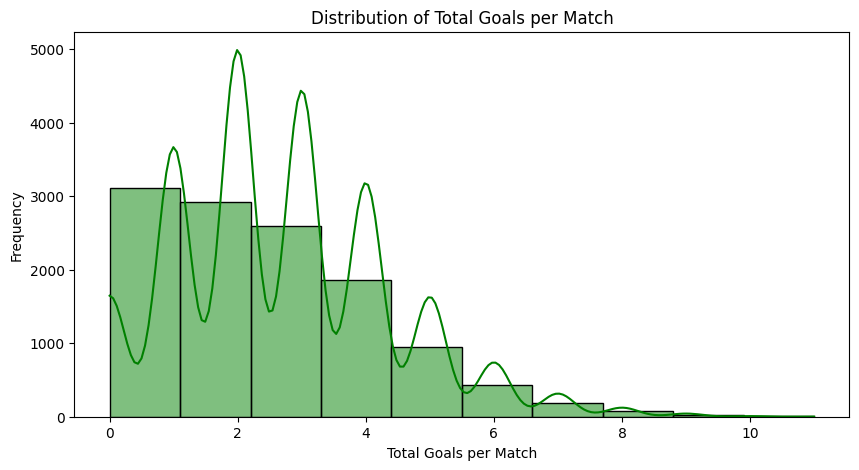

In [ ]:
if 'FTH Goals' in df.columns and 'FTA Goals' in df.columns:
  df['TotalGoals'] = df['FTH Goals'] + df['FTA Goals']
  plt.figure(figsize=(10, 5))
  sns.histplot(df['TotalGoals'], bins=10, kde=True, color='g')
  plt.xlabel("Total Goals per Match")
  plt.ylabel("Frequency")
  plt.title("Distribution of Total Goals per Match")
  plt.show()

In [ ]:
df.columns

Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTH Goals', 'FTA Goals',
       'FT Result', 'HTH Goals', 'HTA Goals', 'HT Result', 'Referee',
       'H Shots', 'A Shots', 'H SOT', 'A SOT', 'H Fouls', 'A Fouls',
       'H Corners', 'A Corners', 'H Yellow', 'A Yellow', 'H Red', 'A Red',
       'Display_Order', 'League', 'TotalGoals'],
      dtype='object')

### Home vs Away Wins

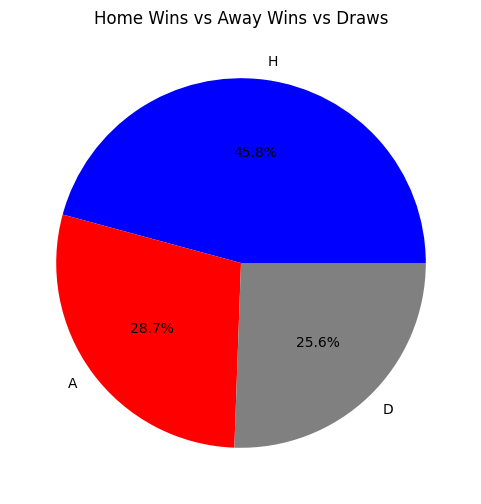

In [ ]:
if 'FT Result' in df.columns:
  results_count = df['FT Result'].value_counts()
  plt.figure(figsize=(6, 6))
  plt.pie(results_count,
          labels=results_count.index,
          autopct='%1.1f%%',
          colors=['blue', 'red', 'gray'])
  plt.title('Home Wins vs Away Wins vs Draws')
  plt.show()

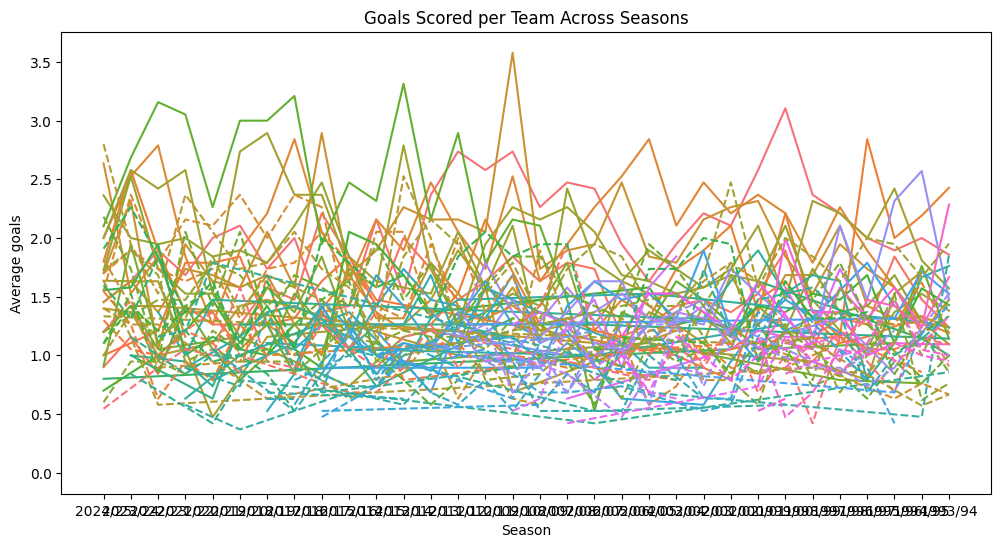

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df,
             x="Season",
             y='FTH Goals',
             hue='HomeTeam',
             estimator='mean',
             ci=None)
sns.lineplot(data=df,
             x="Season",
             y="FTA Goals",
             hue="AwayTeam",
             estimator="mean",
             ci=None,
             linestyle="dashed",
             )

plt.xlabel("Season")
plt.ylabel("Average goals")
plt.title("Goals Scored per Team Across Seasons")
plt.legend([],[], frameon=False) # Hide legend fo clarity

### Full-Time Result Distribution


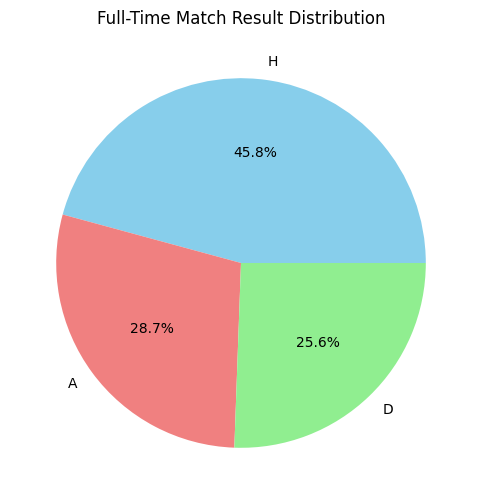

In [ ]:
plt.figure(figsize=(6, 6))
df["FT Result"].value_counts().plot.pie(autopct="%1.1f%%",
                                        colors=["skyblue", "lightcoral", "lightgreen"])
plt.title("Full-Time Match Result Distribution")
plt.ylabel("")
plt.show()

### Referee Impact on Fouls & Cards

<Figure size 1500x600 with 0 Axes>

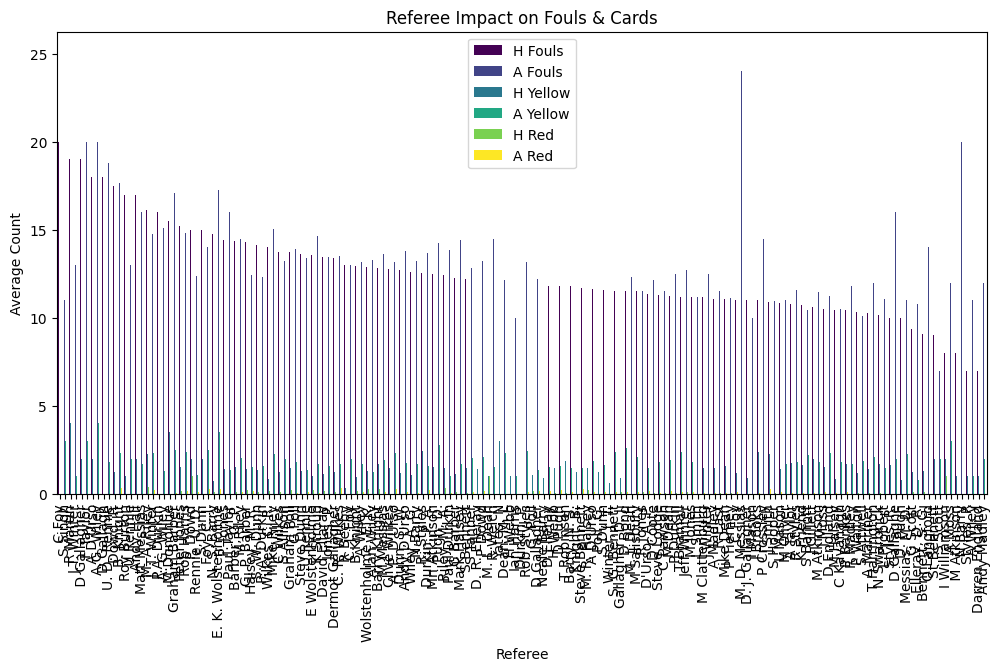

In [ ]:
plt.figure(figsize=(15, 6))
ref_stats = df.groupby("Referee")[["H Fouls", "A Fouls", "H Yellow", "A Yellow", "H Red", "A Red"]].mean().sort_values(by="H Fouls", ascending=False)
ref_stats.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("Referee Impact on Fouls & Cards")
plt.xlabel("Referee")
plt.ylabel("Average Count")
plt.show()

### Shot accuracy (Shots vs Shots on Target)

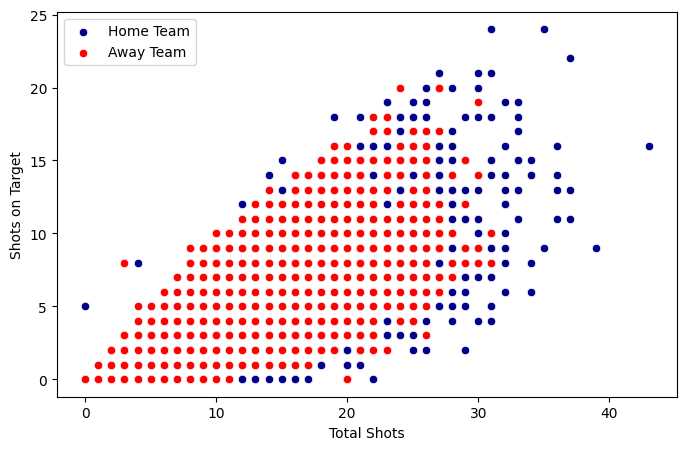

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df['H Shots'],
    y=df['H SOT'],
    color="darkblue",
    label="Home Team"
    )

sns.scatterplot(
    x=df['A Shots'],
    y=df['A SOT'],
    color="red",
    label="Away Team"
)

plt.xlabel("Total Shots")
plt.ylabel("Shots on Target")
plt.legend()
plt.show()

### Fouls vs. Cards Given (Heatmap)

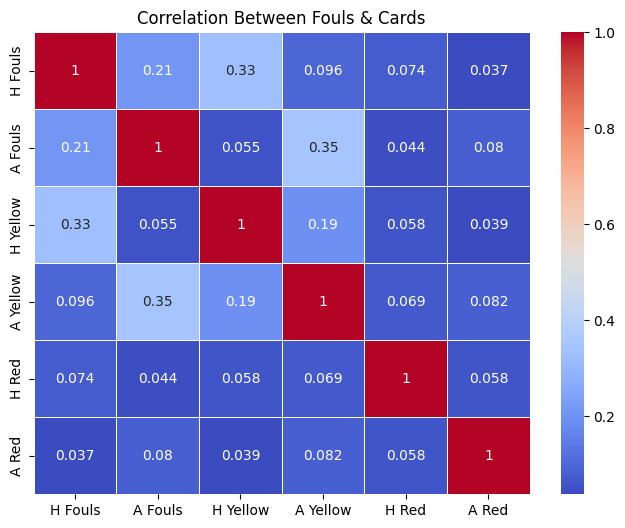

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix= df[["H Fouls", "A Fouls", "H Yellow", "A Yellow", "H Red", "A Red"]].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Between Fouls & Cards")
plt.show()

### Corner kicks vs Goals Scored

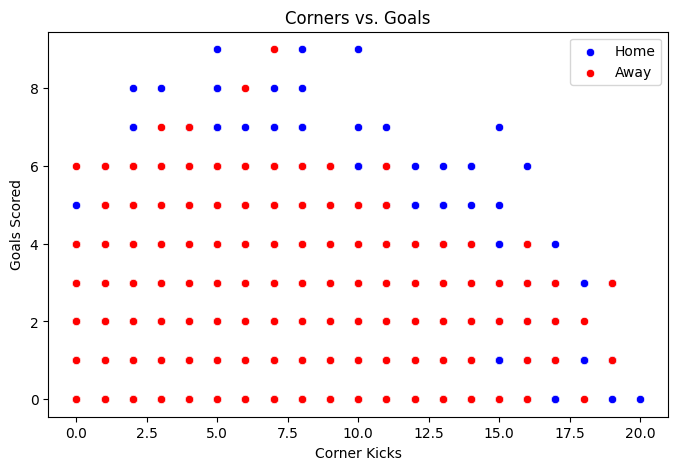

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["H Corners"],
    y=df["FTH Goals"],
    color="blue",
    label="Home"
)

sns.scatterplot(
    x=df["A Corners"],
    y=df["FTA Goals"],
    color="red",
    label="Away"
)


plt.xlabel("Corner Kicks")
plt.ylabel("Goals Scored")
plt.title("Corners vs. Goals")
plt.legend()
plt.show()


### Home vs. Away Perforamnce in Different Leagues

<Figure size 1200x600 with 0 Axes>

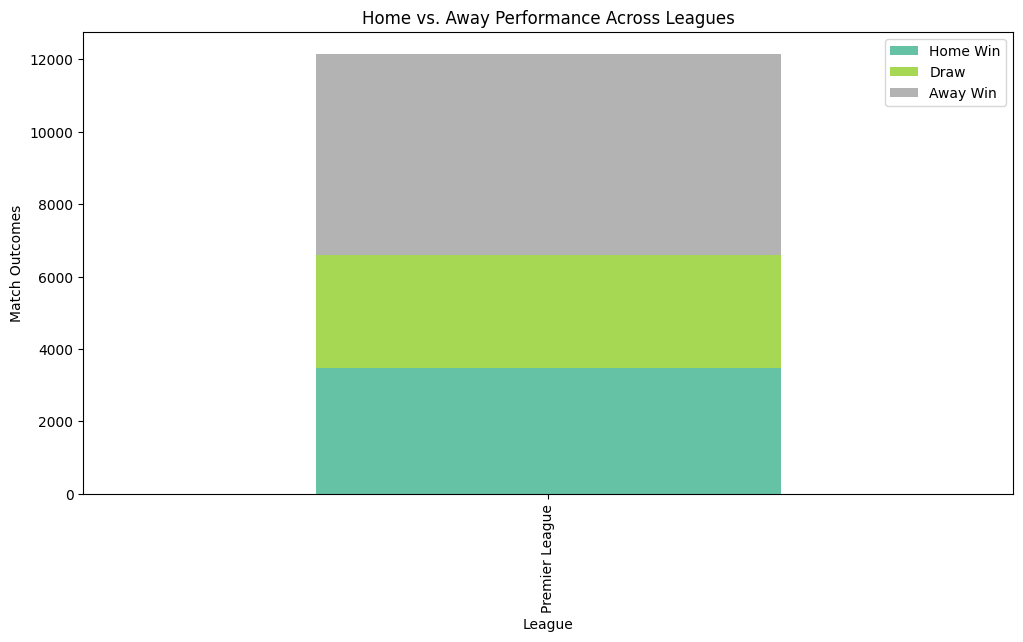

In [ ]:
plt.figure(figsize=(12, 6))
league_performance = df.groupby("League")["FT Result"].value_counts().unstack().fillna(0)
league_performance.plot(
    kind="bar",
    stacked="bar",
    colormap="Set2",
    figsize=(12, 6)
)

plt.title("Home vs. Away Performance Across Leagues")
plt.xlabel("League")
plt.ylabel("Match Outcomes")
plt.legend(["Home Win", "Draw", "Away Win"])
plt.show()

### Most Aggressive Teams (Highest Cards per Match)

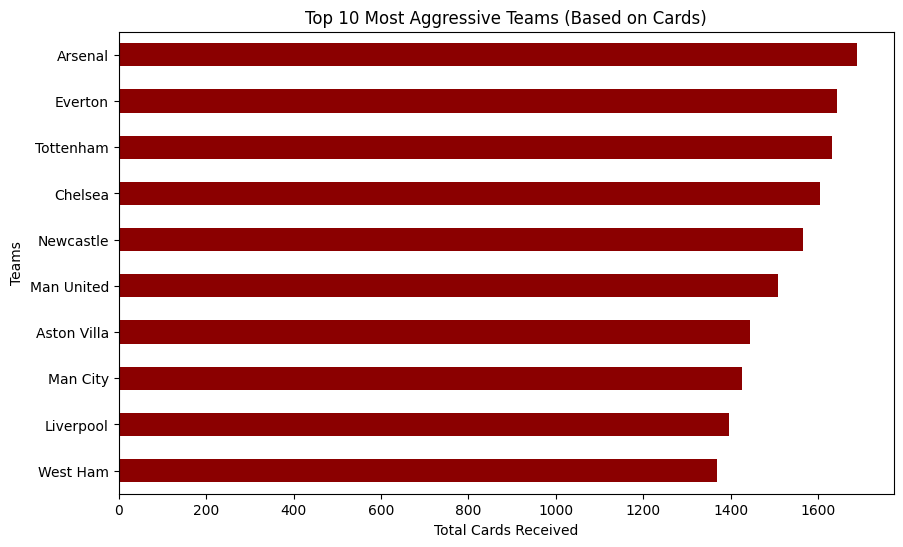

In [ ]:
df["Total_Cards"] = df["H Yellow"] + df["A Yellow"] + df["H Red"] + df["A Red"]
team_cards = df.groupby("HomeTeam")["Total_Cards"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
team_cards.head(10).plot(
    kind="barh",
    color="darkred"
)

plt.title("Top 10 Most Aggressive Teams (Based on Cards)")
plt.xlabel("Total Cards Received")
plt.ylabel("Teams")
plt.gca().invert_yaxis() # Reverse order for better readability
plt.show()

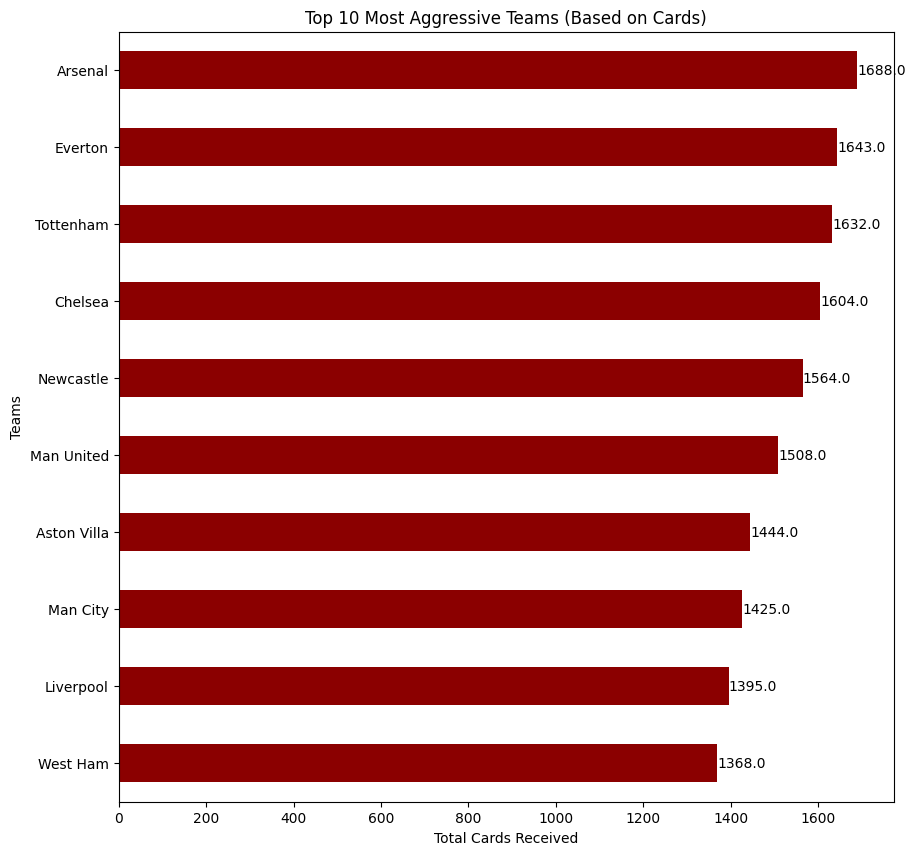

In [ ]:
import matplotlib.pyplot as plt

df["Total_Cards"] = df["H Yellow"] + df["A Yellow"] + df["H Red"] + df["A Red"]
team_cards = df.groupby("HomeTeam")["Total_Cards"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 10))
ax = team_cards.head(10).plot(kind="barh", color="darkred")

plt.title("Top 10 Most Aggressive Teams (Based on Cards)")
plt.xlabel("Total Cards Received")
plt.ylabel("Teams")
plt.gca().invert_yaxis()  # Reverse order for better readability

# Adding data labels
for index, value in enumerate(team_cards.head(10)):
    plt.text(value + 0.5, index, str(value), va="center", fontsize=10, color="black")

plt.show()


### Time-Series of Goals per Season

<Figure size 1000x600 with 0 Axes>

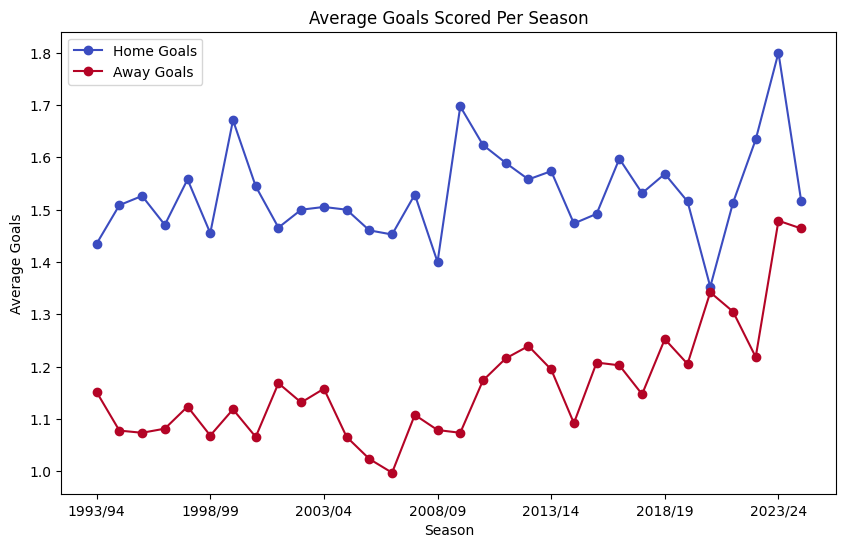

In [ ]:
plt.figure(figsize=(10, 6))
season_goals = df.groupby("Season")[["FTH Goals", "FTA Goals"]].mean()
season_goals.plot(
    kind="line",
    marker="o",
    colormap="coolwarm",
    figsize=(10, 6)
)

plt.title("Average Goals Scored Per Season")
plt.xlabel("Season")
plt.ylabel("Average Goals")
plt.legend(["Home Goals", "Away Goals"])
plt.show()

### First Boxplot for FTH Goals


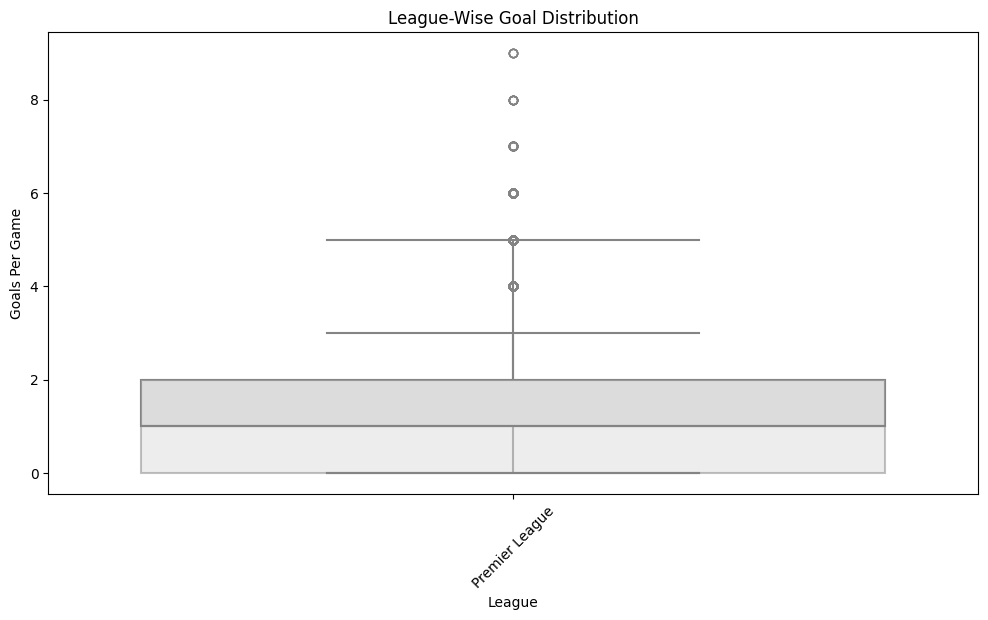

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    x="League",
    y="FTH Goals",
    data=df,
    palette="coolwarm",
    linewidth=1.5
)


sns.boxplot(
    x="League",
    y="FTA Goals",
    data=df,
    palette="coolwarm",
    linewidth=1.5,
    boxprops=dict(alpha=0.5)
)



plt.xlabel("League")
plt.ylabel("Goals Per Game")
plt.title("League-Wise Goal Distribution")
plt.xticks(rotation=45)
plt.show()

### Ensure we work on numeric data only for correlation heatmap

df.shape

In [ ]:
df.shape[1]

27

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

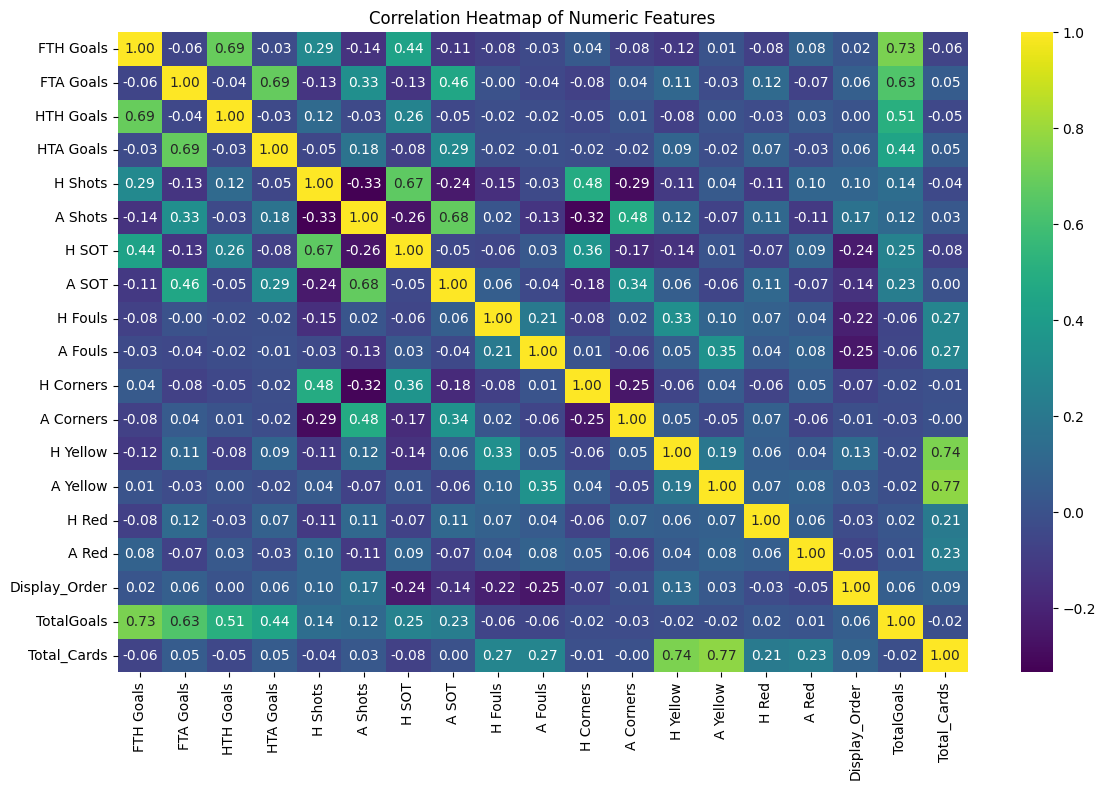

In [ ]:
# Create a correlation heatmap if we have 4 or more numeric columns

if numeric_df.shape[1] >=4:
  plt.figure(figsize=(12, 8))
  sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis", fmt='.2f')
  plt.title("Correlation Heatmap of Numeric Features")
  plt.tight_layout()
  plt.show()

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [50]:
# Load your data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Data/England CSV.csv")

features = ['HTH Goals', "HTA Goals", "H SOT", "A SOT", "H Fouls", "A Fouls"]

In [51]:
# Assumming your tarrget variable is 'target and features are the rest

X = df[features].copy()
y = df["FT Result"].copy()

# Checking for mising values before imputation

print("Missing values before imputation:\n", X.isnull().sum())

Missing values before imputation:
 HTH Goals     924
HTA Goals     924
H SOT        2824
A SOT        2824
H Fouls      2824
A Fouls      2824
dtype: int64


In [52]:
# Applying imputation to fill missing values in X
imputer = SimpleImputer(strategy='mean') # You can use 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)



In [53]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed,
    y, test_size=0.2,
    random_state=42,
    stratify=y)


In [54]:
# Initialize and train the Logistic Regression model for multinominal classification

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

In [55]:
# Evaluate the model performance

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.63


In [56]:
# Optionally, print classification report for more detailed evaluation

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.64      0.65      0.64       696
           D       0.43      0.23      0.30       622
           H       0.66      0.84      0.74      1113

    accuracy                           0.63      2431
   macro avg       0.58      0.57      0.56      2431
weighted avg       0.60      0.63      0.60      2431

